In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **자연어 처리란**

**자연어(natural language)** : 한국어와 영어 등 우리가 평소에 쓰는 말

**자연어처리(natural language preprocessing : NLP)** : 우리의 말을 컴퓨터에게 이해시키기 위한 기술(분야)

자연어는 살아 있는 언어이며 컴퓨터 언어에 비해서 '부드러움'이 있다.

때문에 '딱딱한' 컴퓨터언어에 자연어를 이해시키기란 어려운 일이다.

## **단어의 의미**

단어는 말하자면 의미의 최소 단위이다.

컴퓨터에게 '단어의 이미'를 이해시키는 방법에는 다음 세가지 기법이 있다.

* 시소러스를 활용한 기법(이번 장)
* 통계 기반 기법(이번 장)
* 추론 기반 기법(word2vec) (다음장)

가장 먼저 사람의 손으로 만든 시소러스(thesaurus, 유의어사전)를 이용하는 방법을 간단히 살펴 보자.

## **시소러스**

'단어의 의미'를 나타내는 방법으로는 먼저 사람이 직접 단어의 의미를 정의하는 방식을 생각할 수 있다.

시소러스란 (기본적으로는) 유의어 사전으로, '뜻이 같은 단어(동의어)'나 '뜻이 비슷한 단어(유의어)'가 한 그룹으로 분류되어 있다.

ex) car = auto / automobile / machine / motocar

또한 시소러스에는 단어 사이의 '상위와 하위' 혹은 '전체와 부분'등 더 세세한 관계까지 정의 하기도 한다.

ex)   
object  
|  
motor vehicle  
|  
car / truck

이처럼 단어들의 관계로 단어 사이의 연결을 정의하는 '단어 네트워크'를 이용하여 컴퓨터에게 단어사이의 관계를 가르칠 수 있다. 그러면 간접적으로라도 컴퓨터에게 단어의 의미를 이해시켰다고 주장할 수 있을 것이다.

## **WordNet**

자연어 처리 분야에서 가장 유명한 시소러스는 **WordNet**이다.

WordNet을 사용하면 유의어를 얻거나 '단어 네트워크'를 이용할 수 있다. 또한 단어 네트워크를 사용해 단어 사이의 유사도 또한 구할 수 있다.

## **시소러스의 문제점**

사람이 수작업으로 레이블링하는 방식에는 크나큰 결점이 존재할 수 있다. 다음은 시소러스 방식의 대표적인 문제점들이다.

* **시대 변화에 대응하기 어렵다.**

    때때로 새로운 단어가 생겨나고, 구닥다리 옛말은 언젠가 잊혀진다. 또한 시대에 따라 언어의 의미가 변하기도 한다. 이런 단어의 변화에 대응하려면 시소러스를 사람이 수작업으로 끊임없이 갱신해야 한다.

* **사람을 쓰는 비용이 크다**

    시소러스를 만드는 데는 엄청난 인적 비용이 발생한다.

* **단어의 미묘한 차이를 표현할 수 없다.**

    실제로 비슷한 단어들이라도 미묘한 차이가 있는 법이다. 시소러스에서는 이러한 미묘한 차이를 표현할 수 없다(이 역시 수작업으로 표현하려 한다면 상당히 곤란한 일이 될 수 있다).  

이렇듯 시소러스를 사용하는 기법에는 문제가 많다.

'통계 기반 기법'과 신경망을 사용한 '추론 기반 기법'을 이용하면 대량의 텍스트 데이터로부터 '단어의 의미'를 자동으로 추출한다. 이 덕분에 사람이 순수 단어를 연결짓는 중노동에서 해방된다.

## **통계 기반 기법**

통계 기반 기법에서는 자연어 처리 연구나 애플리케이션을 염두에 두고 수집된 텍스트 데이터인 **말뭉치(corpus)**를 이용한다.

말뭉치란 사람이 쓴 글이므로, 자연어에 대한 사람의 '지식'이 충분히 담겨있다고 볼 수 있다. 통계 기반 기법의 목표는 이처럼 사람의 지식으로 가득한 말뭉치에서 자동으로, 그리고 효율적으로 그 핵심을 추출하는 것이다.

## **파이썬으로 말뭉치 전처리하기**

In [7]:
# text를 단어 단위로 분할

text = 'You say goodbye and I say hello.'

text = text.lower()
text = text.replace('.', ' .')      # 정규표현식을 이용하면 조금 더 간단하게 표현이 가능하긴 하지만 다루지 않겠다.
text

'you say goodbye and i say hello .'

In [8]:
words = text.split(' ')
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [9]:
# 단어를 조작하기 쉽게 ID 부여

word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [10]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [11]:
word_to_id

{'.': 6, 'and': 3, 'goodbye': 2, 'hello': 5, 'i': 4, 'say': 1, 'you': 0}

In [13]:
# 딕셔너리를 사용하면 단어와 단어ID 검색가능

id_to_word[1]

'say'

In [15]:
word_to_id['hello']

5

In [16]:
# '단어 목록'을 '단어 ID 목록'으로 변경

import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [17]:
# 함수로 구현하기

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    corpus = np.array([word_to_id[w] for w in words])

    return corpus, word_to_id, id_to_word

In [18]:
# 함수를 사용하여 말뭉치 전처리

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

## **단어의 분산 표현**

'색'을 벡터로 표현하듯 '단어'도 벡터로 표현할 수 있을까?

우리가 원하는 것은 '단어의 의미'를 정확하게 파악할 수 있는 벡터 표현이다.

이를 자연어 처리 분야에서는 단어의 **분산표현(distributional representation)**이라고 한다.

## **분포 가설**

**분포 가설(distributional hypothesis)** : '단어의 의미는 주변 단어에 의해 형성된다'라는 가설

분포 가설이 말하고자 하는 바는 단어 자체에는 의미가 없고, 그 단어가 사용된 '맥락(context)'이 의미를 형성한다는 것이다.

'맥락'이란 특정 단어를 중심에 둔 그 주변 단어를 말한다. 그리고 맥락의 크기(주변 단어를 몇 개나 포함할지)를 '윈도우 크기(window size)'라고 한다. 윈도우 크기가 1이면 좌우 한 단어씩, 윈도우 크기가 2이면 좌우 두 단어씩 맥락에 포함된다. (굳이 좌우 동수가 될 필욘 없다.)

## **동시발생 행렬**

분포 가설에 기초해 단어를 벡터로 나타내는 방법을 생각해 보면, 주변 단어를 '세어보는'방법이 떠오른다. 즉 어떤 단어에 주목했을 때, 그 주변에 어떤 단어가 몇번이나 등장하는지를 세어 집계하는 방법이다. 이를 '통계 기반(statistical based)' 기법이라고 하겠다.

이제 통계 기반 기법을 살펴보자. 집계한 결과를 행렬로 나타낼 것이다.

In [19]:
my_path = '/content/drive/MyDrive/밑바닥부터시작하는딥러닝2/deep-learning-from-scratch-2-master'

import sys
sys.path.append(my_path)
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [20]:
def create_co_matrix(corpus, vocab_size, window_size=1):
    '''동시발생 행렬 생성
    :param corpus: 말뭉치(단어 ID 목록)
    :param vocab_size: 어휘 수
    :param window_size: 윈도우 크기(윈도우 크기가 1이면 타깃 단어 좌우 한 단어씩이 맥락에 포함)
    :return: 동시발생 행렬
    '''
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [22]:
create_co_matrix(corpus, 7)

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

이를 **동시발생 행렬(co-occurrence matrix)**라고 한다.

예를 들자면, 첫 행은 'you'이고, 두번째 열은 'say'이므로, 첫 번째 행을 살펴보면 'you'의 근처에는 'say'가 한 번 카운트 되고 나머지 단어는 없음을 알 수 있다.

## **벡터 간 유사도**

벡터 사이의 유사도를 측정하는 방법은 다양하다. 대표적으로는 벡터의 내적이나 유클리드 거리 등을 꼽을 수 있는데, 단어 벡터의 유사도를 나타낼 때는 **코사인 유사도(cosine similarity)**를 자주 이용한다.

$$similarity=cos(\theta)=\frac{x⋅y}{||x||\ ||y||}=\frac{\sum_{i=1}^{n}{x_{i}×y_{i}}}{\sqrt{\sum_{i=1}^{n}(x_{i})^2}×\sqrt{\sum_{i=1}^{n}(y_{i})^2}}$$  

이 식의 핵심은 벡터를 정규화하고 내적을 구하는 것이다. 직관적으로 풀어보자면 '두 벡터가 가리키는 방향이 얼마나 비슷한가'이다. 두 벡터의 방향이 완전히 같다면 코사인 유사도가 1이 되며, 완전히 반대라면 -1이 된다.

이제, 코사인 유사도를 파이썬 함수로 구현해보자.

In [24]:
def cos_similarity(x, y, eps=1e-8):       # 엡실론(epsilon)의 도입으로 분모를 0으로 나누지 않게 된다.
    nx = x / np.sqrt(np.sum(x**2) + eps)  # x의 정규화
    ny = y / np.sqrt(np.sum(y**2) + eps)  # y의 정규화
    return np.dot(nx, ny)

이를 통해 "you"와 "i(=I)"의 유사도를 구하는 코드를 확인해보자.

In [25]:
from common.util import preprocess, create_co_matrix, cos_similarity

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

c0 = C[word_to_id['you']]  # "you"의 단어 벡터
c1 = C[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.7071067691154799


비교적 유사성이 크다고 말할 수 있다.

## **유사 단어의 랭킹 표시**

어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수를 구현해보자.

In [26]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색
    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    if query not in word_to_id:
        print('%s(을)를 찾을 수 없습니다.' % query)
        return

    print('\n[query] ' + query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]

    # 코사인 유사도 계산
    vocab_size = len(id_to_word)

    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)

    # 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(' %s: %s' % (id_to_word[i], similarity[i]))

        count += 1
        if count >= top:
            return

In [27]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)


[query] you
 goodbye: 0.7071067691154799
 i: 0.7071067691154799
 hello: 0.7071067691154799
 say: 0.0
 and: 0.0


hello와 goodbye가 코사인 유사도가 높은것은 직관과는 거리가 멀다. 지금의 경우 말뭉치의 크기가 너무 작기 때문에 이러한 문제가 발생하는 것이다. 이것으로 통계 기반 기법의 '기본'을 마친다.

# **통계 기반 기법 개선하기**

사실 동시발생 행렬에는 개선할 점이 있다. 이번에는 개선 작업을 수행한 후 더 실용적인 말뭉치를 사용하여 '진짜'단어의 분산 표현을 획득한다.

## **상호정보량**

사실 동시발생 행렬의 원소인 '발생'횟수라는 것은 사실 그리 좋은 특징이 아니다. 고빈도 단어로 예를 들어보자.

"the"와 "car"의 동시발생을 생각해보자. 분명히 "... the car ..."라는 문구가 자주 보일 것이다. 따라서 두 단어의 동시발생 횟수는 아주 많다. 한편, "car"와 "drive"는 연관이 아주 깊다. 하지만 단순히 등장 횟수만 보자면 "the"가 훨씬 많다. 결국 "the"가 고빈도 단어라서 "car"와 강한 관련성을 갖는다고 결론 짓게 되는 것이다.

이를 해결하기 위해 **점별 상호정보량(Pointwise Mutual Information, PMI)**라는 척도를 사용한다.

$$PMI(x,y) = {log_2}\frac{P(x,y)}{P(x)P(y)}$$

$P(x)$는 $x$가 일어날 확률, $P(x,y)$는 x와 y가 동시에 일어날 확률을 뜻한다. 이 PMI 값이 높을수록 관련성이 높다는 의미이다.

동시발생 행렬 $C$을 이용해서 식을 다시 써보자.

$$PMI(x,y) = {log_2}\frac{P(x,y)}{P(x)P(y)}=log_2\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}}=log_2\frac{C(x,y)N}{C(x)C(y)}$$

따라서 동시발생 핼렬로부터 PMI를 구할 수 있다.

앞서 든 예시를 PMI 관점에서 바라보자.

$$PMI("the","car")=log_2\frac{10*10000}{1000*20}\approx2.32$$

$$PMI("car","drive")=log_2\frac{5*10000}{20*10}\approx7.97$$

이 결과에서 알 수 있듯이 PMI를 이용하면 "car"는 "the"보다 "drive"와의 관련성이 강해진다. 이는 우리가 원하던 결과이다. 이 예에서는 "the"가 자주 출현했으므로 PMI점수가 낮아진 것이다.

하지만 PMI척도에도 한가지 문제가 있다. 동시발생 횟수가 0이면 $log_20 = -\infty$가 된다는 점이다. 이 문제를 피하기 위해 실제 구현 할때는 **양의 상호정보량(Positive PMI, PPMI)** 을 사용한다.

$$PPMI(x, y) = max(0, PMI(x,y))$$

이 식에 따라 PMI가 음수일 때는 0으로 취급한다.

이제, 동시발생 행렬을 PPMI 행렬로 변환하는 함수를 구현해보자.

In [28]:
def ppmi(C, verbose=False, eps = 1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return:
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)
    S = np.sum(C, axis=0)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[j]*S[i]) + eps)
            M[i, j] = max(0, pmi)

            if verbose:
                cnt += 1
                if cnt % (total//100 + 1) == 0:
                    print('%.1f%% 완료' % (100*cnt/total))
    return M

동시발생 행렬을 PPMI 행렬로 변환해보자.

In [29]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)
W = ppmi(C)

np.set_printoptions(precision=3) # 유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


동시발생 행렬보다 더 좋은 척도로 이뤄진 행렬을 손에 쥐었다. 하지만 PPMI 행렬에도 여전히 큰 문제가 있다. 말뭉치의 어휘 수가 증가함에 따라 각 단어의 벡터의 차원 수도 증가한다는 문제이다. 예를 들어 말뭉치의 어휘 수가 10만 개라면 벡터의 차원 수도 10만이 된다. 10만 차원의 벡터를 다루는 것은 그다지 현실적이지 않다.

또한, 이 행렬의 원소들 대부분이 0이다. 즉 벡터의 원소 대부분이 중요하지 않다는 뜻이다. 이런 벡터는 노이즈에 약하고 견고하지 못하다는 약점이 존재한다. 이를 대처하고자 자주 수행하는 기법이 바로 벡터의 차원 감소이다.

## **차원 감소**

**차원 감소(dimensionality reduction)**는 문자 그대로 벡터의 차원을 줄이는 방법을 말한다. 그러나 단순히 줄이기만 하는게 아니라, '중요한 정보'는 최대한 유지하면서 줄이는게 핵심이다. 데이터의 분포를 고려해 중요한 '축'을 찾는 일을 수행한다.

원소 대부분이 0인 행렬 또는 벡터를 '희소행렬(sparse matrix)' 또는 '희소벡터(sparse vector)'라 한다. 차원 감소의 핵심은 희소벡터에서 중요한 축을 찾아내어 더 적은 차원으로 다시 표현하는 것인데, 차원 감소의 결과로 원래의 희소벡터는 원소 대부분이 0이 아닌 값으로 구성되는 '밀집벡터'로 변환된다. 이 조밀한 벡터야 말로 우리가 원하는 단어의 분산 표현이다.

차원을 감소시키는 방법은 여러 가지가 있다. 그중에서 우리는 **특잇값분해(Singular Value Decomposition, SVD)**를 이용한다. SVD는 임의의 행렬을 세 행렬의 곱으로 분해하며, 수식으로는 다음과 같다.

$$X=US{V}^T$$

$U$와 $V$는 직교행렬(orthogonal matrix)이고, 그 열벡터는 서로 직교한다. 또한 $S$는 대각행렬(diagonal matrix)이다.

$U$는 직교행렬이므로 어떠한 공간의 축(기저)을 형성한다. 우리의 맥락에서는 이 $U$ 행렬을 '단어 공간'으로 취급할 수 있다. 또한 $S$는 대각행렬로, 그 대각성분에는 '특잇값(singular value)'이 큰 순서로 나열되어 있다. 특잇값이란 쉽게 말해 '해당 축'의 중요도라고 간주할 수 있다. 따라서 중요도가 낮은 원소(특잇값이 작은 원소)를 깎아내는 방법을 생각할 수 있다.

행렬 $S$에서 특잇값이 작다면 중요도가 낮다는 뜻이므로, 행렬 $U$에서 여분의 열벡터를 깎아내어 원래의 행렬을 근사할 수 있다. 이를 우리 문제로 가져와서 '단어의 PPMI 행렬'에 적용해보자.

## **SVD에 의한 차원 감소**


In [30]:
import matplotlib.pyplot as plt

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(id_to_word)
C = create_co_matrix(corpus, vocab_size, window_size=1)
W = ppmi(C)

# SVD
U, S, V = np.linalg.svd(W)

In [33]:
np.set_printoptions(precision=3)  # 유효 자릿수를 세 자리로 표시
print(C[0]) # 동시 발생 행렬의 벡터
print(W[0]) # PPMI 행렬의 벡터
print(U[0]) # SVD

[0 1 0 0 0 0 0]
[0.    1.807 0.    0.    0.    0.    0.   ]
[-1.110e-16  3.409e-01 -4.163e-16 -1.205e-01 -1.110e-16 -9.323e-01
 -1.086e-16]


이 결과에서 보듯 원래는 희소벡터인 W[0]이 SVD에 의해서 밀집벡터 U[0]으로 변했다. 또한 이 밀집벡터의 차원을 감소시키려면, 원하는 차원만큼의 원소만 꺼내면 된다.

In [34]:
print(U[0, :2]) # 예로 2차원 벡터로 줄인다.

[-1.110e-16  3.409e-01]


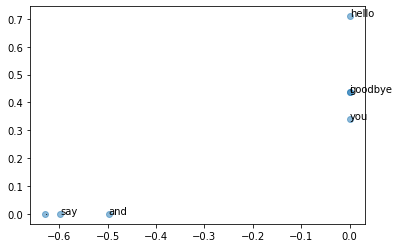

In [36]:
# 각 단어를 2차원 벡터로 표현 후 시각화

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0], U[word_id, 1]))
plt.scatter(U[:,0], U[:,1], alpha=0.5)
plt.show()

나름의 직관과 비교적 비슷하지만 지금 사용한 말뭉치가 아주 작아서 이 결과를 그대로 받아들이기 석연치 않다. 따라서 PTB 데이터셋이라는 더 큰 말뭉치를 사용하여 똑같은 실험을 수행해보자.  

*행렬의 크기가 N이면 계산량이 N의 3제곱에 비례해 늘어나므로 현실적으로 감당하기 어려운 수준이다. 따라서 특잇값이 작은 것은 버리는(truncated)방식으로 성능 향상을 꾀하는 Truncated SVD 같은 더 빠른 기법을 이용한다.*

## **PTB 데이터셋**

In [38]:
# PTB 데이터셋 불러오기

from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:', corpus[:30])
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


## **PTB 데이터셋 평가**

PTB 데이터셋에 통계 기법을 적용하는데, 큰 행렬에 SVD를 적용해야 하므로 사이킷런의 고속 SVD를 이용한다.

그러면 시간도 절약하고 메모리도 훨씬 덜 사용할 수 있다.

In [40]:
window_size = 2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print('PPMI 계산 ...')
W = ppmi(C, verbose=True)

print('calculating SVD ...')
try:
    # truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,
                             random_state=None)     # Truncated SVD는 무작위 수를 사용하므로 결과가 매번 다르다.
except ImportError:
    # SVD (느리다)
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]

querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top=5)

동시발생 수 계산 ...
PPMI 계산 ...
1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
calculating SVD ...

[query] you
 i: 0.6973986625671387
 do: 0.5475264191627502
 else: 0.508

결과를 보면 우리의 직관과 비슷한 결과를 확인할 수 있다. 대규모 말뭉치를 사용하면 단어의 분산 표현의 품질이 더 좋아지는 것을 알 수 있다.

# **정리**

* **WordNet 등의 시소러스를 이용하면 유의어를 얻거나 단어 사이의 유사도를 측정하는 등 유용한 작업을 할 수 있다.**
* **시소러스 기반 기법은 시소러스를 작성하는 데 엄청난 인적 자원이 든다거나 새로운 단어에 대응하기 어렵다는 문제가 있다.**
* **현재는 말뭉치를 이용해 단어를 벡터화하는 방식이 주로 쓰인다.**
* **최근의 단어 벡터화 기법들은 대부분 '단어의 의미는 주변 단어에 의해 형성된다'는 분포 가설에 기초한다.**
* **통계 기반 기법은 말뭉치 안의 각 단어에 대해서 그 단어의 주변 단어의 빈도를 집계한다(동시발생 행렬).**
* **동시발생 행렬을 PPMI 행렬로 변환하고 다시 차원을 감소시킴으로써, 거대한 '희소벡터'를 작은 '밀집벡터'로 변환할 수 있다.**
* **단어의 벡터 공간에서는 의미가 가까운 단어는 그 거리도 가까울 것으로 기대된다.**